In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sys
print('Environment:', sys.executable)

/home/fterroso/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Environment: /usr/bin/python3


### Polygons with municipalities

In [6]:
raw_municipalities_gdf = gpd.read_file(os.path.join('data', 'Municipios_IGN_with_area', 'Municipios_IGN_with_area.gpkg'))
#raw_municipalities_gdf = gpd.read_file(os.path.join('data', 'Municipios_IGN-shp', 'Municipios_IGN.shp'))

In [7]:
raw_municipalities_gdf.head()

,INSPIREID,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,CODIGOINE,SHAPE_Leng,SHAPE_Area,area_km2,geometry
0,ES.IGN.SIGLIM34081616266,34081616266,Villarejo-Periesteban,ES4,ES42,ES423,16266,0.269748,0.003520,33.429,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
1,ES.IGN.SIGLIM34081616269,34081616269,Villares del Saz,ES4,ES42,ES423,16269,0.447608,0.007382,70.160,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
2,ES.IGN.SIGLIM34081616270,34081616270,Villarrubio,ES4,ES42,ES423,16270,0.305394,0.002978,28.256,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
3,ES.IGN.SIGLIM34081616271,34081616271,Villarta,ES4,ES42,ES423,16271,0.283123,0.002680,25.616,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
4,ES.IGN.SIGLIM34081616272,34081616272,Villas de la Ventosa,ES4,ES42,ES423,16272,0.595828,0.015355,145.106,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


In [8]:
municipalities_gdf = raw_municipalities_gdf[['CODIGOINE', 'NATCODE', 'area_km2', 'geometry']]
municipalities_gdf = municipalities_gdf.set_index('CODIGOINE')

In [9]:
municipalities_gdf.head()

,NATCODE,area_km2,geometry
CODIGOINE,,,
16266,34081616266,33.429,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
16269,34081616269,70.160,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
16270,34081616270,28.256,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
16271,34081616271,25.616,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
16272,34081616272,145.106,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


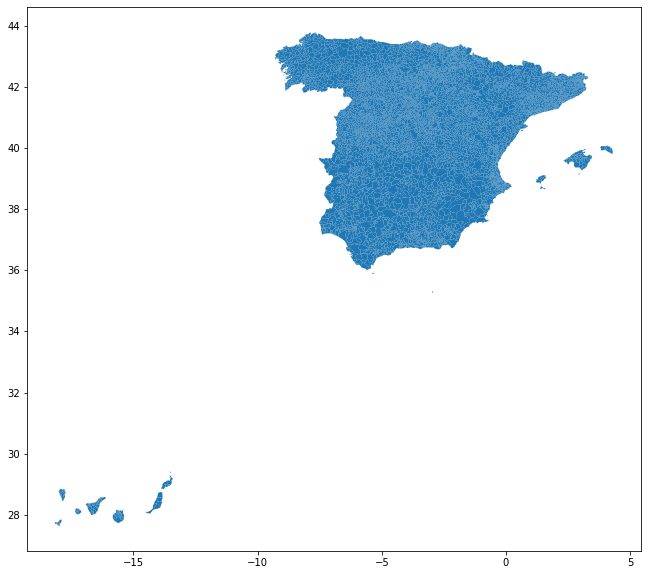

In [10]:
municipalities_gdf.plot(figsize=(20,10));

## Total number of holiday houses

In [7]:
total_viviendas_df = pd.read_csv(os.path.join('data','total_viviendas_turisticas_por_municipio.csv'), sep=';', decimal=',',encoding="ISO-8859-1")
total_viviendas_df['Total'] = total_viviendas_df['Total'].astype(float)

In [8]:
total_viviendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Municipios          8188 non-null   object 
 1   Viviendas y plazas  8188 non-null   object 
 2   Periodo             8188 non-null   object 
 3   Total               8188 non-null   float64
dtypes: float64(1), object(3)
memory usage: 256.0+ KB


In [9]:
total_viviendas_df.head()

,Municipios,Viviendas y plazas,Periodo,Total
0,Total Nacional,Viviendas turísticas,2020M08,321.496
1,01 Andalucía,Viviendas turísticas,2020M08,67.392
2,04 Almería,Viviendas turísticas,2020M08,4.811
3,04013 Almería,Viviendas turísticas,2020M08,578.000
4,04068 Olula de Castro,Viviendas turísticas,2020M08,0.000


In [10]:
total_viviendas_df.tail()

,Municipios,Viviendas y plazas,Periodo,Total
8183,51 Ceuta,Viviendas turísticas,2020M08,66.0
8184,51001 Ceuta,Viviendas turísticas,2020M08,66.0
8185,19 Melilla,Viviendas turísticas,2020M08,43.0
8186,52 Melilla,Viviendas turísticas,2020M08,43.0
8187,52001 Melilla,Viviendas turísticas,2020M08,43.0


In [11]:
total_viviendas_df['Total'].sum()

159606.505

In [14]:
def get_postal_code_fn(mun_name):
    if mun_name[0].isdigit():
        return mun_name.split(' ')[0]
    return '00'

In [15]:
def format_name_fn(df):
    df['cod_INE']= df['Municipios'].apply(get_postal_code_fn)
    df['Nombre']= df['Municipios'].apply(lambda x: x.split(' ')[1])
    df = df.drop(columns='Municipios')
    df = df.set_index('cod_INE')
    df= df[df.index.value_counts()==1]
    return df

In [16]:
total_viviendas_df = format_name_fn(total_viviendas_df)

<ipython-input-15-7275cdd60b3b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df= df[df.index.value_counts()==1]


In [17]:
total_viviendas_df.head()

,Viviendas y plazas,Periodo,Total,Nombre
cod_INE,,,,
00,Viviendas turísticas,2020M08,321.496,Nacional
04013,Viviendas turísticas,2020M08,578,Almería
04068,Viviendas turísticas,2020M08,0,Olula
04071,Viviendas turísticas,2020M08,0,Padules
04073,Viviendas turísticas,2020M08,0,Paterna


In [18]:
total_viviendas_df['Viviendas y plazas'].unique()

array(['Viviendas turísticas'], dtype=object)

In [19]:
total_viviendas_df = total_viviendas_df.drop(columns='Viviendas y plazas')

In [20]:
total_viviendas_df['Periodo'].unique()

array(['2020M08'], dtype=object)

In [21]:
total_viviendas_df = total_viviendas_df.drop(columns='Periodo')

In [22]:
total_viviendas_df.head()

,Total,Nombre
cod_INE,,
00,321.496,Nacional
04013,578,Almería
04068,0,Olula
04071,0,Padules
04073,0,Paterna


In [23]:
total_viviendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8150 entries, 00 to 52001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Total   8150 non-null   object
 1   Nombre  8150 non-null   object
dtypes: object(2)
memory usage: 191.0+ KB


### Relative number of holiday houses

In [24]:
rel_viviendas_df = pd.read_csv(os.path.join('data','porcentaje_viviendas_turisticas_por_municipio_2011.csv'), decimal=',', sep=';', encoding="ISO-8859-1")

In [25]:
rel_viviendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Municipios  8188 non-null   object 
 1   Periodo     8188 non-null   object 
 2   Total       8188 non-null   float64
dtypes: float64(1), object(2)
memory usage: 192.0+ KB


In [26]:
rel_viviendas_df = format_name_fn(rel_viviendas_df)

<ipython-input-15-7275cdd60b3b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df= df[df.index.value_counts()==1]


In [27]:
rel_viviendas_df = rel_viviendas_df.rename(columns={'Total':'Rate'})

In [28]:
rel_viviendas_df.loc['00']

Periodo     2020M08
Rate           1.28
Nombre     Nacional
Name: 00, dtype: object

In [29]:
rel_viviendas_df.head()

,Periodo,Rate,Nombre
cod_INE,,,
00,2020M08,1.28,Nacional
04013,2020M08,0.58,Almería
04068,2020M08,0.00,Olula
04071,2020M08,0.00,Padules
04073,2020M08,0.00,Paterna


In [30]:
total_viviendas_df.head()

,Total,Nombre
cod_INE,,
00,321.496,Nacional
04013,578,Almería
04068,0,Olula
04071,0,Padules
04073,0,Paterna


### Merge total and rate number of houses

In [31]:
viviendas_df = total_viviendas_df.copy()
viviendas_df.head()

,Total,Nombre
cod_INE,,
00,321.496,Nacional
04013,578,Almería
04068,0,Olula
04071,0,Padules
04073,0,Paterna


In [32]:
viviendas_df['Rate'] = rel_viviendas_df['Rate']

In [33]:
viviendas_df.head()

,Total,Nombre,Rate
cod_INE,,,
00,321.496,Nacional,1.28
04013,578,Almería,0.58
04068,0,Olula,0.00
04071,0,Padules,0.00
04073,0,Paterna,0.00


In [34]:
viviendas_df.loc[viviendas_df['Rate'].idxmax()]

Total       210
Nombre    Búger
Rate      29.75
Name: 07009, dtype: object

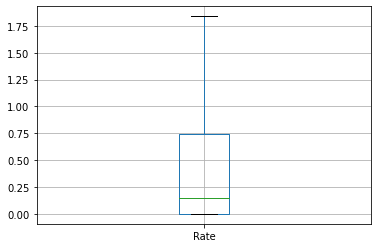

In [35]:
viviendas_df['Rate'].plot(kind='box', showfliers=False, grid=True);

In [36]:
viviendas_df.shape

(8150, 3)

In [37]:
viviendas_df[viviendas_df['Rate']>1].shape

(1637, 3)

### Add geo-reference to the houses

In [38]:
municipalities_gdf[['Viv-total', 'Viv-rel', 'Name']]= viviendas_df[['Total', 'Rate', 'Nombre']]

In [39]:
municipalities_gdf.head()

,NATCODE,area_km2,geometry,Viv-total,Viv-rel,Name
CODIGOINE,,,,,,
16266,34081616266,33.429,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...",0,0.00,Villarejo-Periesteban
16269,34081616269,70.160,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...",1,0.15,Villares
16270,34081616270,28.256,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...",0,0.00,Villarrubio
16271,34081616271,25.616,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...",0,0.00,Villarta
16272,34081616272,145.106,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...",3,0.48,Villas


In [40]:
municipalities_gdf.tail()

,NATCODE,area_km2,geometry,Viv-total,Viv-rel,Name
CODIGOINE,,,,,,
38050,34053838050,108.542,"MULTIPOLYGON (((-17.32958 28.08035, -17.32959 ...",107,6.60,Vallehermoso
38051,34053838051,18.086,"MULTIPOLYGON (((-16.48783 28.43752, -16.48775 ...",22,0.61,Victoria
38052,34053838052,56.271,"MULTIPOLYGON (((-16.68464 28.12064, -16.68468 ...",51,5.42,Vilaflor
38053,34053838053,70.672,"MULTIPOLYGON (((-17.79311 28.52490, -17.79311 ...",85,3.25,Villa
38901,34053838901,82.736,"MULTIPOLYGON (((-17.96450 27.68740, -17.96445 ...",82,6.86,Pinar


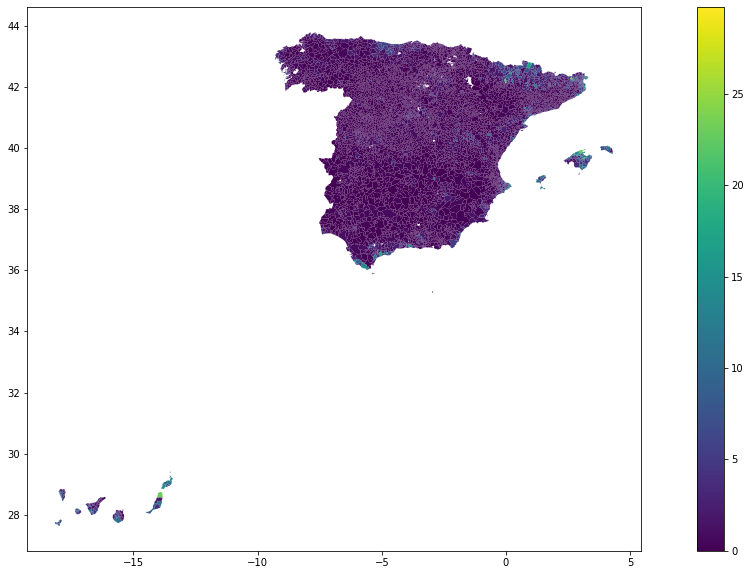

In [41]:
municipalities_gdf.plot(column='Viv-rel', legend=True, figsize=(20,10));

In [42]:
municipalities_gdf.to_file(os.path.join('data', 'municipalities.geojson'), driver='GeoJSON')

In [43]:
print("That's all folks")

That's all folks
